In [13]:
import pandas as pd
import glob
folder = r"F:\Lab\nfs\base\*.csv"

In [43]:
folder = r"F:\Lab\nfs\base-visob\stats\right\Female\*.csv"

all_data = []
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [44]:
folder = r"F:\Lab\nfs\base-visob\stats\right\Male\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'M100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [45]:
folder = r"F:\Lab\nfs\base-visob\stats\right\50-50\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F50M50'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [21]:
all_data

[]

In [46]:
df = pd.DataFrame(all_data)
# df.head()
df[0] = df[0].apply(lambda x:x.split("_")[0])

# df = df[df[8] == "F75M25"]

df.columns = ["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "Train Balance", "Test Balance"]

df.head()

,Experiment ID,AUC,EER,ZeroFMR,FMR10,FMR20,FMR100,FMR1000,Train Balance,Test Balance
0,DenseNet121,0.934562,0.1436,0.9820,0.2058,0.3466,0.6320,0.8486,F100,F100
1,DenseNet121,0.963762,0.1014,0.8638,0.1028,0.1848,0.4828,0.8072,F50M50,F100
2,DenseNet121,0.943674,0.1306,0.8472,0.1648,0.2822,0.5562,0.7622,M100,F100
3,EfficientNetB0,0.968071,0.0926,0.9306,0.0878,0.1488,0.4034,0.7376,F100,F100
4,EfficientNetB0,0.976945,0.0766,0.9186,0.0582,0.1202,0.3356,0.7558,F50M50,F100


In [51]:
import plotly.express as px

import plotly.graph_objects as go

# Group by Network, Train Balance, TestBalance
df_ = df[df["Train Balance"] == "M100"]
fig = px.bar(df_, x="Experiment ID", y="EER", color="Test Balance", 
                 title="Wide-Form Input",  barmode='group', log_y=True)
fig.show()


In [52]:
import wandb

run = wandb.init(project='UFPR-Ocular', entity='sreeraj')


import plotly.express as px


my_table = wandb.Table(columns=["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "DataBalance"], data=df)
run.log({"visob_m100r": fig})

_runtime,6
_timestamp,1634110499
_step,0


_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


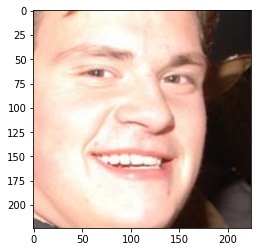

In [2]:
import cv2

img = cv2.imread(r"F:\Lab\datasets\fairface\fairface-img-margin025-trainval\train\1104.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt
# img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(img)
plt.show()

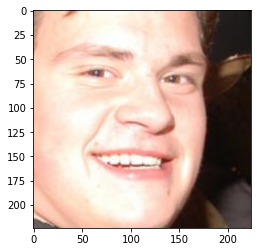

In [3]:
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(img)
plt.show()

In [ ]:
header = list(df.iloc[0])
header[-5:] = list(df.columns)[-5:]


df_new = pd.DataFrame(all_data, columns=header)

df_new.head()
# df_new.to_csv(r"F:\Lab\nfs\base\stats\open_world_f75m25.csv")

In [ ]:
gender_df = pd.read_csv(r"F:\Lab\datasets\UFPR-Periocular\UFPR-Periocular\experimentalProtocol\open_world_valopen\test_fold1.txt", header=None, sep=' ', usecols=[0, 3])
gender_df[0] = gender_df[0].apply(lambda x: x.split('.')[0][:-1] + '.jpg')

gender_df = gender_df[gender_df[3] == 1]
# gender_df[0] = gender_df[0].apply(lambda x: os.path.join(train_dir, x))
gender_df.head()


In [ ]:
gender_df[2] = gender_df[0].apply(lambda x: x[1:5])

In [ ]:
def generate(num=5000):
    res = []
    from random import choice

    # select same
    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        while elem1[0].iloc[0] == elem2[0].iloc[0]:
            elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 0))
    

    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] != elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 1))
    return res
df = generate()

df = pd.DataFrame(df)

df.head()

In [ ]:
df[df[0] == df[1]]

In [2]:
# Crop images into same size

from glob import glob
import cv2 

from tqdm import tqdm

max_width, max_height = 0, 0
min_width, min_height = 100000, 100000

min_ar = 10000
max_ar = 0

heights = []
widths = []

for f in tqdm(glob(r"F:\Lab\nfs\notredame\nir-data\*.png")):
    img = cv2.imread(f)
    height, width, channels = img.shape
    heights.append(height)
    widths.append(width)
    max_width = max(width, max_width)
    max_height = max(height, max_height)
    min_width = min(width, min_width)
    min_height = min(height, min_height)

    ar = width/height
    min_ar = min(ar, min_ar)
    max_ar = max(ar, max_ar)


print(min_height, max_height)
print(min_width, max_width)
print(min_ar, max_ar)

100%|██████████| 21939/21939 [07:23<00:00, 49.52it/s]

132 1102
267 2619
1.6521739130434783 6.895522388059701


1470.5380372851998 532.7004421350107


(array([2.200e+01, 5.600e+01, 1.386e+03, 9.100e+03, 7.966e+03, 2.834e+03,
        4.550e+02, 9.200e+01, 2.400e+01, 4.000e+00]),
 array([ 132.,  229.,  326.,  423.,  520.,  617.,  714.,  811.,  908.,
        1005., 1102.]),
 <a list of 10 Patch objects>)

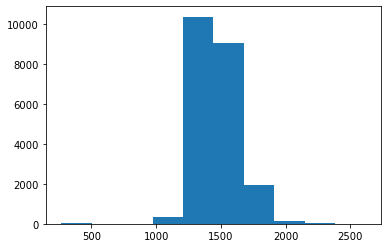

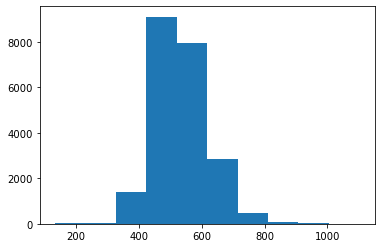

In [19]:
import numpy as np
print(np.array(widths).mean(), np.array(heights).mean())

import matplotlib.pyplot as plt

plt.hist(widths)
plt.figure()
plt.hist(heights)

In [28]:
# Crop images

target_dir = r"F:\Lab\nfs\notredame\nir-cropped"

for f in tqdm(glob(r"F:\Lab\nfs\notredame\nir-data\*.png")):
    img = cv2.imread(f)
    filename = f.split(os.path.sep)[-1]
    width, height, channels = img.shape
    if width / height < 2.6:
        height = img.shape[0]
        height = int(height * 0.95 * 0.95)
        img = img[:height,:,:]

    img = cv2.resize(img, (1470, 532))
    cv2.imwrite(os.path.join(target_dir, filename), img)

100%|██████████| 21899/21899 [22:35<00:00, 16.15it/s]


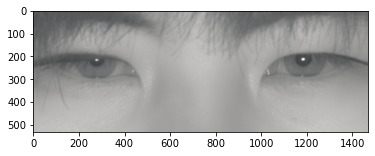

In [29]:
plt.imshow(img)

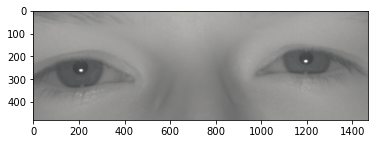

In [27]:
height = img.shape[0]
height = int(height * 0.95)
img = img[:height,:,:]

plt.imshow(img)

In [10]:
# Label images


import json

import pandas as pd

label_dict = {}
for f in glob(r"F:\Lab\nfs\notredame\data\*.json"):
    with open(f, 'r') as fd:
        data = json.load(fd)

    filename = data['imagePath']
    id_ = filename.split('d')[0]
    label = int(data['flags']['Male'])

    label_dict[id_] = label

# Manually add the missiing

label_dict['06754'] = 1

In [39]:
import os

data = []
failed = []
subjects = list(label_dict.keys())
for f in glob(r'F:\Lab\nfs\notredame\nir-data\*.png'):
    try:
        filename = f.split(os.path.sep)[-1]
        id_ = filename.split('d')[0]
        label = label_dict[id_]
        subject = subjects.index(id_)
        data.append([filename, label, subject])
    except Exception as e:
        print(e)
        failed.append(filename)


df = pd.DataFrame(data, columns=['file', 'gender', 'subject'])
df.to_csv('nir_gender_labels.csv')
df.tail()

,file,gender,subject
21894,06994d44.png,0,582
21895,06994d45.png,0,582
21896,06994d46.png,0,582
21897,06994d53.png,0,582
21898,06994d54.png,0,582


In [69]:
# Train : Test 80:20
males = list(df[df['gender'] == 1]['subject'].unique())
females = list(df[df['gender'] == 0]['subject'].unique())

# Remove the test set first then balance the training set
import random

test_males = random.sample(males, int(len(females) * 0.1))
test_females = random.sample(females, int(len(females) * 0.1))

In [70]:
setA = set(test_males)
setB = set(males)

train_males = setB.difference(setA)

setA = set(test_females)
setB = set(females)

train_females = setB.difference(setA)


In [71]:
train_males = random.sample(train_males, len(train_females))

train_male_df = df[df['subject'].isin(train_males)]
train_female_df = df[df['subject'].isin(train_females)]

print(len(train_male_df), len(train_female_df))

8965 8885


In [72]:


test_male_df = df[df['subject'].isin(test_males)]
test_female_df = df[df['subject'].isin(test_females)]

print(len(test_male_df), len(test_female_df))

909 951


In [74]:
train_df = pd.concat([train_male_df, train_female_df])

test_df = pd.concat([test_male_df, test_female_df])

In [75]:
test_df.to_csv('nir_labels_test.csv')

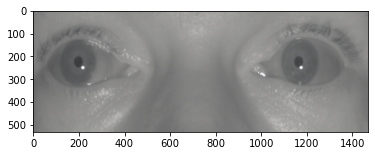

In [80]:
import tensorflow as tf

img = cv2.imread(r"F:\Lab\nfs\notredame\nir-cropped\02463d3896.png")

plt.imshow(img)

In [81]:
img = tf.image.resize(img, (532//3, 1470//3), method='nearest')

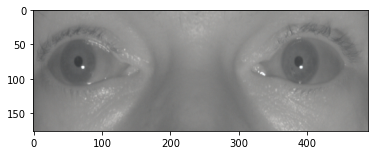

In [82]:
plt.imshow(img)

In [76]:
train_df.to_csv('nir_labels_train.csv')

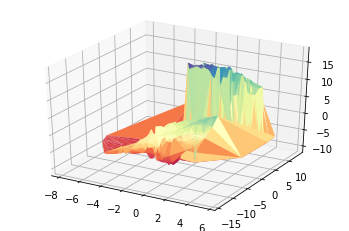

In [7]:



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay

data = np.load(r"C:\Users\g728v562\Downloads\tsne.npz.npy")

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# u, v are parameterisation variables
# u = np.array([0,0,0.5,1,1]) 
# v = np.array([0,1,0.5,0,1]) 

# x = u
# y = v
# z = np.array([0,0,1,0,0])

# Triangulate parameter space to determine the triangles
#tri = mtri.Triangulation(u, v)
tri = Delaunay(np.array([x,y,z]).T)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
#ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap=plt.cm.Spectral)


plt.show()


In [ ]:
# Start 